In this demo exercise, we will be performing dimensionality reduction using supervised and unsupervised techniques. 

We will be using the Superconductivity dataset for this demo. The dataset contains 82 features for a given superconductor like mean temperature coefficient, mean radius, atomic mass etc. Our task is to perform dimensionality reduction on these features and visualize these features in the lower dimension.

In order to understand the advantages of working in the lower dimension we will perform classification and regression on the original dataset as well as the reduced dimension dataset and compare the performance of the two.


The complete dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data# 

Citation:Hamidieh, Kam, A data-driven statistical model for predicting the critical temperature of a superconductor, Computational Materials Science, Volume 154, November 2018, Pages 346-354,

In [305]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import time     # this library provides various time related functions like current time, date etc.

# Data Visualization and Manipulation

In [306]:
#load the dataset
data=pd.read_csv("/content/drive/My Drive/train.csv")
data_dummy=pd.read_csv("/content/drive/My Drive/train.csv")   #we will perform manipulation on the dummy data so that we can preserve the original data for further analysis
data_dummy2=pd.read_csv("/content/drive/My Drive/train.csv")
data.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,...,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,...,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,...,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1010.544286,718.152900,938.512777,1.305967,0.783207,810.6,739.575000,323.811808,355

In [307]:
#get information about the data and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [308]:
#get the data statistics
data.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,41.448045,769.614748,870.442317,737.474751,832.769649,1.299172,0.926726,572.222612,483.517264,215.631279,224.050033,157.983101,134.720039,144.448738,120.989330,1.267756,1.131138,139.325025,51.369885,51.601267,52.340465,6111.465214,5267.188547,3460.692235,3117.241110,1.072425,0.856037,8665.438818,2902.736814,3416.910784,...,92.717486,54.359502,72.416225,1.070250,0.770757,120.730514,59.332637,48.912207,44.409356,14.296113,13.848001,10.136977,10.141161,1.093343,0.914065,21.138994,8.218528,8.323333,7.717576,89.706911,81.549080,29.841727,27.308061,0.727630,0.539991,250.893443,62.033066,98.943993,96.234051,3.198228,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,19.983544,87.488694,143.278200,78.327275,119.772520,0.381935,0.334018,309.614442,224.042874,109.966774,127.927104,20.147288,28.801567,22.090958,35.837843,0.375411,0.407159,67.272228,35.019356,22.898396,25.294524,2846.785185,3221.314506,3703.256370,3975.122587,0.342356,0.319761,4097.126831,2398.471020,1673.624915,...,32.276387,29.007425,31.648444,0.343391,0.285986,58.700327,28.620409,21.740521,20.429293,11.300188,14.279335,10.065901,13.134007,0.375932,0.370125,20.370620,

Text(0.5, 1.0, 'Histogram of critical temperature')

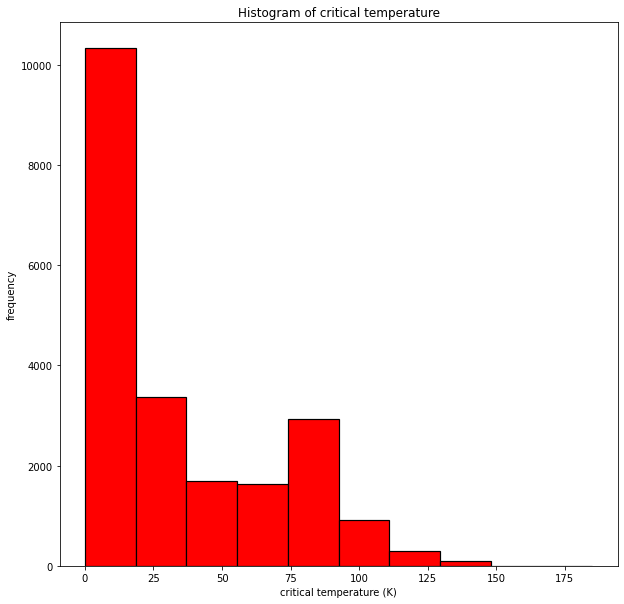

In [309]:
# plot the histogram of critical temperature to understand the distribution of data. We will divide the data into 10 bins.
plt.figure(figsize=(10,10))
plt.hist(data["critical_temp"],bins=10,facecolor='red',edgecolor='black',linewidth=1.2)
plt.xlabel("critical temperature (K)")
plt.ylabel("frequency")
plt.title("Histogram of critical temperature")

Text(0, 0.5, 'mean density ')

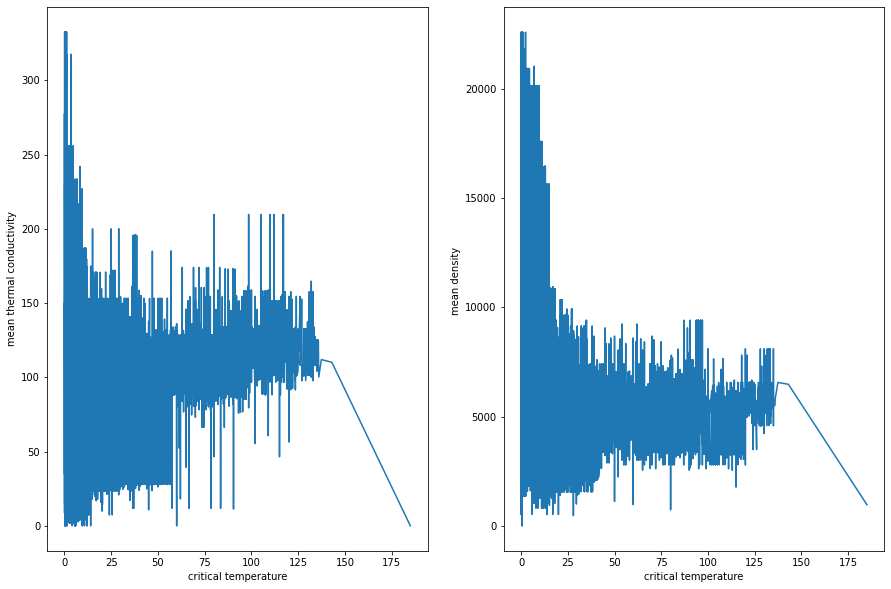

In [310]:
#for clear plots, we first sort the dataset according to the critical temperature.
data_dummy2=data_dummy2.sort_values(by=['critical_temp'])

# generate few plots to better understand the data and data distribution
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(data_dummy2["critical_temp"],data_dummy2["mean_ThermalConductivity"])
plt.xlabel("critical temperature")
plt.ylabel("mean thermal conductivity")

plt.subplot(1,2,2)
plt.plot(data_dummy2["critical_temp"],data_dummy2["mean_Density"])
plt.xlabel("critical temperature")
plt.ylabel("mean density ")

The task of this section is to classify the superconductors based on their critical temperatures. Since the critical temperatures are continuous in nature, we will categorize them in three distinct classes. 

1. Low temperature superconductors - $T_c$ < 50 K
2. Medium temperature superconductor -  50 K $\leq$ $T_c$ < 90 K 
3. High temperature superconductors - $T_c$ $\ge$ 90 K

In order to categorize them, we apply thresholding on the "critical_temp" column.

The class labels are as follows:
1. Low temperature superconductors - 0
2. Medium temperature superconductors - 1
3. High temperature superconductors - 2

In [311]:
# we will compare the values of the columns of "critical_temp" in the data variable and make changes to the data_dummy variable
data_dummy.loc[data.critical_temp <50, "critical_temp"] = 0
data_dummy.loc[data.critical_temp >=50, "critical_temp"] = 1
data_dummy.loc[data.critical_temp >=90, "critical_temp"] = 2

In [312]:
# now since the column has categorical data, we convert the data type to category.
data_dummy["critical_temp"]=data_dummy["critical_temp"].astype('category')
data_dummy.head(30)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,...,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,...,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,...,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,0.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1010.544286,718.152900,938.512777,1.305967,0.783207,810.6,739.575000,323.811808,355.18

In [313]:
print(data_dummy['critical_temp'].value_counts())

0.0    14884
1.0     4395
2.0     1984
Name: critical_temp, dtype: int64


# Linear Discriminant Analysis

Here we will perform dimensionality reduction using the supervised technique- Linear Discriminant Analysis (LDA). 

The original data that is present is high dimension (81) will now be reduced to 2 dimensions. We will visualize the data in the two dimensions and understand the effect of dimensionality reduction on the performance of a classifier.

In [314]:
#assign the data to corresponding variables- x input data, y-class labels
x_class=data_dummy.drop(["critical_temp"],axis=1)
y_class=data_dummy["critical_temp"]
print(x_class.shape, y_class.shape)

(21263, 81) (21263,)


Data Preprocessing - Split the data into train and test set and scale the input variable 

In [315]:
#import libraries necessary for carrying out LDA and classification using Gaussian Naive Bayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB  # We will use the Gaussian Naive bayes classifier model
from sklearn.model_selection import train_test_split

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_class, y_class, test_size=0.2, random_state=0)


from sklearn.preprocessing import StandardScaler
# Standardize the input variable
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Shape of input before dimensionality reduction:",X_train.shape)

Shape of input before dimensionality reduction: (17010, 81)


Dimensionality Reduction using LDA

In [316]:
#We will project the input data onto two dimensions
lda = LDA(n_components=2) #specify the number of dimensions to keep

X_train = lda.fit_transform(X_train, y_train) # find the lower dimensions which are the largest eigen vectors of X_train. Then project onto the lower dimension.
X_test = lda.transform(X_test)  #project the test data to the lower dimensions
print("Shape of input after dimensionality reduction:",X_train.shape)

Shape of input after dimensionality reduction: (17010, 2)


No handles with labels found to put in legend.


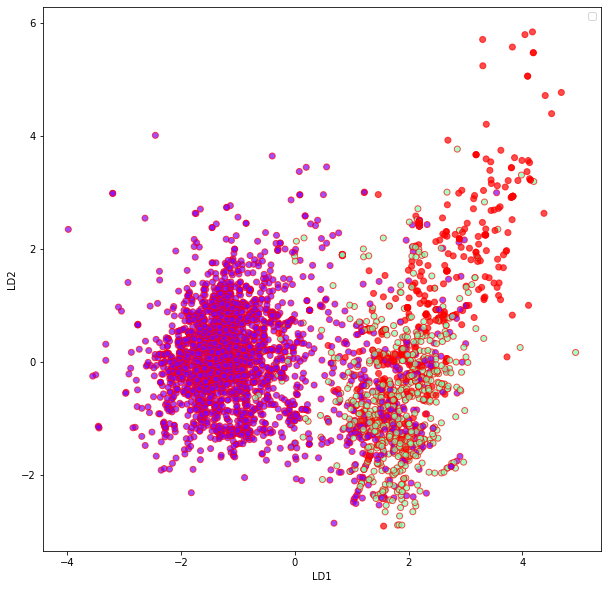

In [317]:
#visualize the data in the lower dimensions. We will plot the graph of data for the first two components
plt.figure(figsize=(10,10))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='rainbow',alpha=0.7,edgecolors='r')
plt.legend()


Classification using Gaussian Naive Bayes.

In order to understand the effects of dimensionality reduction we will perform the following tasks:
1. Carry out classification on the original data set and record the accuracy. Also record the computation time required to carry out this task.
2. Carry out classification on the reduced dimension data set and record the accuracy. Also record the computation time required to carry out this task.
3. Compare the accuracy and computation time for both the methods.

Classification on the original data (without dimensionality reduction)

In [318]:
#Test the model for accuracy without performing LDA

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_class, y_class, test_size=0.2, random_state=0)

# Scale the input using StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)


#### We will not perform LDA on the data ####
#lda = LDA(n_components=2)
#X_train = lda.fit_transform(X_train, y_train)
#X_test = lda.transform(X_test)

classifier=GaussianNB()
t= time.time()
classifier.fit(X_train1, y_train1)
y_pred = classifier.predict(X_test1)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test1, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test1, y_pred)))

elapsed = time.time() - t

print("Time taken to run the code:",elapsed)

[[2142  710  122]
 [  22  653  221]
 [  10  173  200]]
Accuracy0.704208793792617
Time taken to run the code: 0.0303037166595459


Predict the class of an unknown superconductor given its properties

We will randomly select a sample from the test class and assume it to be an unknown sample.

In [320]:
X_unknown=[X_test1[58]]
print(X_unknown)

pred_class = classifier.predict(X_unknown)
print(pred_class)

[array([-1.46604805,  2.46544649,  1.51592081,  2.66175248,  1.71583585,
       -1.40729594, -1.52354019, -0.42159341,  1.82424416,  0.09148646,
       -0.68467966, -1.52333321, -2.06990904, -1.35572309, -2.17750547,
       -1.60449397, -1.64827412, -1.33228929, -0.23203923, -1.2386904 ,
       -1.37694485, -0.14743693,  0.72670893,  0.4765831 ,  0.96563962,
       -1.52848359, -1.98366416, -2.03728902,  2.09146847, -2.20737613,
       -2.04269077,  1.1138984 ,  0.74784602,  1.50850247,  1.12493533,
       -1.17830945, -1.37454046, -1.12963213,  1.05381962, -0.83658724,
       -1.30813591, -1.56128393, -1.90856339, -0.72506433, -1.30817337,
       -1.10893355, -1.42331747, -1.93873802, -1.24246235, -2.0957684 ,
       -2.07621052, -0.91013022, -0.73567525, -0.61690566, -0.51725865,
       -1.11385046, -1.37948599, -0.96465075, -0.50926661, -0.8745807 ,
       -0.99836231, -0.81119289, -0.09030785,  0.69617105,  1.19719789,
       -0.35703597, -1.12119231, -1.28349662,  0.19760383, -1.2

Classification using reduced dimensions

In [321]:
classifier=GaussianNB() #define instance of a classifier
t = time.time() #record the starting time 
classifier.fit(X_train, y_train)  #fit the model on train data
y_pred = classifier.predict(X_test) #predict the classes on test data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:' + str(accuracy_score(y_test, y_pred)))
elapsed = time.time() - t    #record total time. total time=end time - starting time

print("Time taken to run the code:",elapsed)  #print the total time for computation

[[2613  329   32]
 [  65  761   70]
 [   5  192  186]]
Accuracy:0.8370561956266165
Time taken to run the code: 0.01321268081665039


Predict the class of an unknown superconductor given its properties

We will randomly select a sample from the test class and assume it to be an unknown sample.

In [322]:
X_unknown=[X_test[58]]
print(X_unknown)

pred_class = classifier.predict(X_unknown)
print(pred_class)

[array([-1.36221728,  0.49916842])]
[0.]


In [323]:
## Additional exploration

#### We can also use the column "number_of elements" as the class labels just for visualization purpose. you can try out and see the results. Here is that starting code to convert the column as a class label.
# for this class distribution you will see a clear separation in the reduced dimension.
'''
data2=pd.read_csv("/content/drive/My Drive/train.csv")
print("original data type:",data2['number_of_elements'].dtype)
data['number_of_elements']=data2['number_of_elements'].astype("category")
print("data type after conversion:",data2['number_of_elements'].dtype)
print(data2['number_of_elements'].value_counts())

x_class=data2.drop(["number_of_elements"],axis=1)
y_class=data2["number_of_elements"]

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_class, y_class, test_size=0.2, random_state=0)


from sklearn.preprocessing import StandardScaler
# Standardize the input variable
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("Shape of input before dimensionality reduction:",X_train.shape)

#We will project the input data onto two dimensions
lda = LDA(n_components=2) #specify the number of dimensions to keep

X_train = lda.fit_transform(X_train, y_train) # find the projection onto the lower dimension
X_test = lda.transform(X_test)  #project the test data to the lower dimensions
print("Shape of input after dimensionality reduction:",X_train.shape)

#visualize the data in the lower dimensions. We will plot the graph of data for the first two components
plt.figure(figsize=(10,10))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',alpha=0.7,edgecolors='r')
'''

'\ndata2=pd.read_csv("/content/drive/My Drive/train.csv")\nprint("original data type:",data2[\'number_of_elements\'].dtype)\ndata[\'number_of_elements\']=data2[\'number_of_elements\'].astype("category")\nprint("data type after conversion:",data2[\'number_of_elements\'].dtype)\nprint(data2[\'number_of_elements\'].value_counts())\n\nx_class=data2.drop(["number_of_elements"],axis=1)\ny_class=data2["number_of_elements"]\n\n#split the data into train and test\nX_train, X_test, y_train, y_test = train_test_split(x_class, y_class, test_size=0.2, random_state=0)\n\n\nfrom sklearn.preprocessing import StandardScaler\n# Standardize the input variable\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\nprint("Shape of input before dimensionality reduction:",X_train.shape)\n\n#We will project the input data onto two dimensions\nlda = LDA(n_components=2) #specify the number of dimensions to keep\n\nX_train = lda.fit_transform(X_train, y_train) # find the proj

# Principal Component Analysis

The task of this section is to develop a simple regression model to predict the critical temperature of a superconductor given its properties. 

Here we will perform dimensionality reduction using the unsupervised technique- Principal Component Analysis (PCA). 

The original data that is present is high dimension (81) will now be reduced to 30 dimensions. We will understand the amount of variance explained by each dimension, select the minimum required dimensions using the scree plot and understand the effect of dimensionality reduction on the performance of a regression model.

Data Preprocessing - Split the data into train and test set and scale the input variable 

In [324]:
#seperate the predictors from the response variables
X=data.drop(['critical_temp'],axis=1)

#We wish to predict the critical temperature of the superconductor given its properties.
Y=data['critical_temp']

In [325]:
#split the data into training and test batches
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=21)

In [326]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
print(scaled_X_train.shape)

(14884, 81)


In [327]:
#copy the training and test variables to another variable
x_train_no_pca,x_test_no_pca=scaled_X_train.copy(),scaled_X_test.copy()

Dimensionality reduction using PCA

In [328]:
#Use PCA to reduce dimensions. We will keep the first 30 dimensions
from sklearn.decomposition import PCA
pca=PCA(30) #specify the number of dimensions to keep
train_data=pca.fit_transform(scaled_X_train)  #find the principal components and project the train data
test_data=pca.transform(scaled_X_test)  #project the test data onto the principal components

print("The explained variance ratios are:\n",pca.explained_variance_ratio_) #print the projected variance of each Principal Component
print("\nThe total variance in the data is :",pca.explained_variance_ratio_.sum())
print("\nThe number of components:",pca.n_components_)

The explained variance ratios are:
 [0.38984961 0.10372094 0.09574401 0.07838508 0.05866997 0.03798628
 0.03640241 0.03131361 0.02361432 0.01953116 0.01841625 0.01477365
 0.01184465 0.01009375 0.00980215 0.00785224 0.0071858  0.00547871
 0.00481541 0.00381444 0.00304257 0.00292446 0.00257324 0.00208194
 0.00198937 0.00184734 0.00168495 0.00143231 0.00125383 0.00115663]

The total variance in the data is : 0.9892810987378122

The number of components: 30


Text(0.5, 1.0, 'Scree Plot')

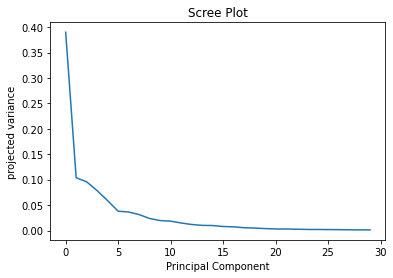

In [329]:
#create the scree plot to visualize the projected variance vs principal component
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("projected variance")
plt.title("Scree Plot")

Text(0, 0.5, 'PC2')

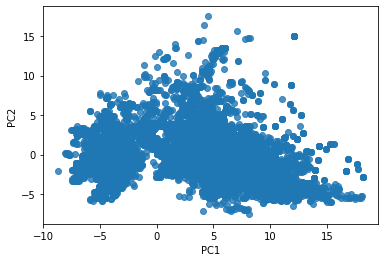

In [330]:
# We will visualize the projected points on the principal components by consider the principal components as the axes

#plot of PC1 vs PC2 (First Principal Component vs Second Principal Component)
plt.scatter(train_data[:, 0], train_data[:, 1], alpha=0.8, label='Dimension Reduced')
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC30')

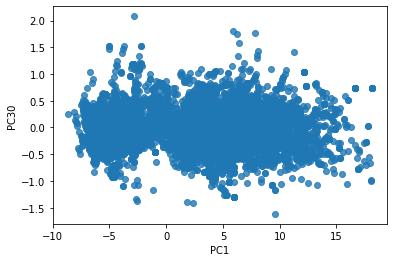

In [331]:
#plot of PC1 vs PC30 
plt.scatter(train_data[:, 0], train_data[:, 29], alpha=0.8, label='Dimension Reduced')
plt.xlabel("PC1")
plt.ylabel("PC30")

Text(0, 0.5, 'PC30')

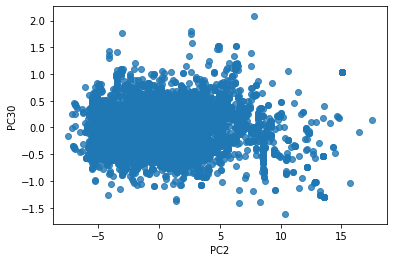

In [332]:
#plot of PC2 vs PC30. You can try out other principal components and visualize the results
plt.scatter(train_data[:, 1], train_data[:, 29], alpha=0.8, label='Dimension Reduced')
plt.xlabel("PC2")
plt.ylabel("PC30")

Regression using Simple Linear Regression model.

In order to understand the effects of dimensionality reduction we will perform the following tasks:
1. Carry out regression on the original data set and record the error and R2 value. Also record the computation time required to carry out this task.
2. Carry out regression on the reduced dimension data set and record the error and R2 value. Also record the computation time required to carry out this task.
3. Compare the values and computation time for both the methods.

Linear Regression on Original Data

In [333]:
#Linear regression using original points
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
linear_model=LinearRegression()
t = time.time() #record the starting time
linear_model.fit(x_train_no_pca,Y_train)
Y_predicted=linear_model.predict(x_test_no_pca)

print("The intercept :",linear_model.intercept_)
print("\n The co-efficient are:\n",linear_model.coef_)
mse=mean_squared_error(Y_test,Y_predicted)
rmse=np.sqrt(mse)   #we will use the Root Mean Square Error metric
print("The RMSE is :",rmse)
print("The R2 score:",r2_score(Y_test,Y_predicted))
elapsed = time.time() - t     #record total time. total time=end time - starting time

print("Time taken to run the code:",elapsed)

The intercept : 34.440193299852254

 The co-efficient are:
 [  -6.32217378   26.54589734  -32.05285111  -16.71053978   24.78951135
  -12.07544292    0.72515721   11.99907668    0.8539186   -11.45028537
    1.73251236   19.18386917  -37.9966954   -16.77955455   34.23404264
  -58.71945825   14.50813255   20.93699507    4.89345658  -24.03141448
   -0.8693302   -12.19463059  104.08002219    5.15567139 -114.69862908
   35.97077404   18.34145561   14.52712933   -3.68096516   -7.32318445
  -11.15303234  -14.58967639   -0.99861615    4.62236272   11.22639132
    3.65405528   -4.70488321   -5.94372355   -0.24772788    9.453328
   -1.99989315   -3.23060123   17.54342703    5.65402439  -19.26929114
    1.63154324   -6.28309747  -21.95985349   -4.02951738   28.16707215
  -12.12502812   17.97497085  -24.97241108  -14.64066204   19.31717623
   -6.86278078    8.91563364   -8.27281977    6.1792996    -3.15841498
    4.7655761    -1.7871991    21.53049959   -2.56623176  -11.47594257
    4.1034392     0

Linear Regression on principal components

In [334]:
#Linear Regression using the principal components as the input variables
linear_model=LinearRegression()
t = time.time()
linear_model.fit(train_data,Y_train)
Y_predicted=linear_model.predict(test_data)

print("The intercept :",linear_model.intercept_)
print("\n The co-efficient are:\n",linear_model.coef_)
mse=mean_squared_error(Y_test,Y_predicted)
rmse=np.sqrt(mse)
print("The RMSE is :",rmse)
print("The R2 score:",r2_score(Y_test,Y_predicted))
elapsed = time.time() - t

print("Time taken to run the code:",elapsed)

The intercept : 34.44019329985219

 The co-efficient are:
 [-3.98414184 -2.10738225  2.2278618  -1.41661051  2.50669806  3.30326563
 -0.59923357 -0.66001922 -1.89865311 -0.33795585 -3.26463598 -2.22804299
  1.04653278 -1.3531555   3.64356781 -0.1033134  -0.02031316 -4.97219469
  2.10098968  8.27522818  2.47729579  1.59466059 13.15922295  0.84021081
 11.59618709  5.6022678   0.79706382  1.32672306 -1.61400328 -4.08674311]
The RMSE is : 19.129801061508307
The R2 score: 0.6899837983705033
Time taken to run the code: 0.017724990844726562
